# Sentiment Analysis of Covid-19 Tweets

# Data Acquisition

In [85]:
# Import google drivers
from google.colab import drive

In [86]:
# Mount the google driver
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# Import all the necessary libraries for implementing this analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Remove unwanted warning messages
import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [88]:
#Rading the Data
#train_data = pd.read_csv('E:/SangitaP/data/Corona_NLP_train.csv',encoding='latin_1')
#test_data = pd.read_csv('E:/SangitaP/data/Corona_NLP_test.csv',encoding='latin_1')

#train_data

In [89]:
# Set dataset path to driver path
path1 = "/content/sample_data/Covid19Tweets/Corona_NLP_test.csv"
path2 = "/content/sample_data/Covid19Tweets/Corona_NLP_train.csv"

train_data = pd.read_csv(path1, encoding='latin_1')
test_data = pd.read_csv(path2, encoding='latin_1')

print("Shape of train data: ", train_data.shape)
print("Shape of test data: ", test_data.shape)

Shape of train data:  (3798, 6)
Shape of test data:  (41157, 6)


In [90]:
# Display first and last five records in the dataframe
test_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [91]:
# Display first and last five records in the dataframe
train_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [92]:
# Display dataframe information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [93]:
# Display dataframe information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


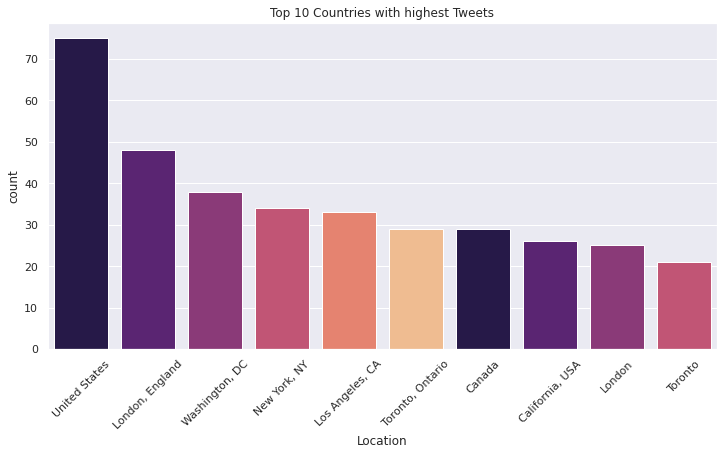

In [94]:
#Top 10 Countries that had the highest tweets
palette=sns.color_palette('magma')
sns.set(palette=palette)

plt.figure(figsize=(12,6))
plt.title('Top 10 Countries with highest Tweets')
countries =sns.countplot(x='Location', data=train_data, order=train_data['Location'].value_counts().index[:10], palette=palette)
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 

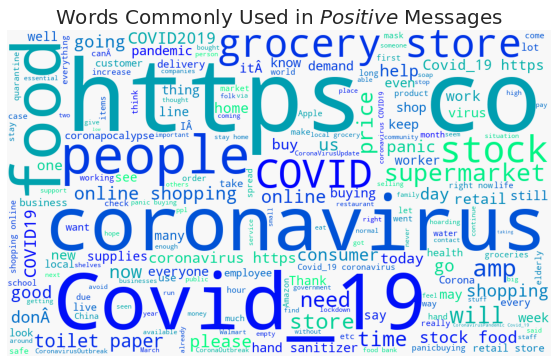

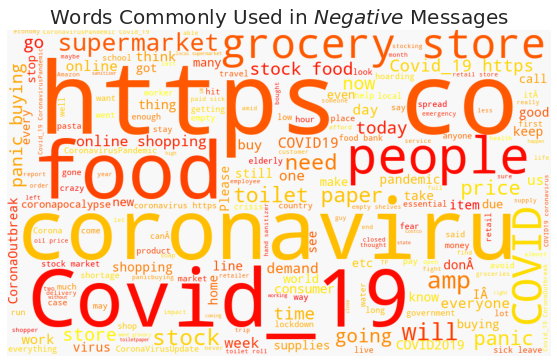

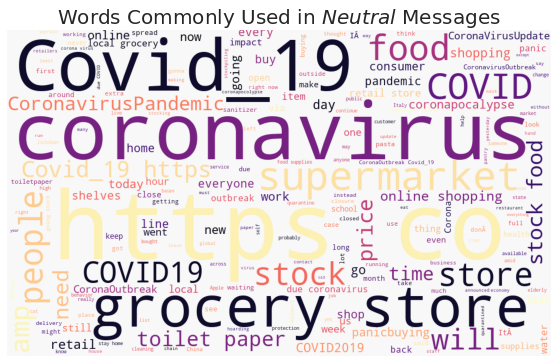

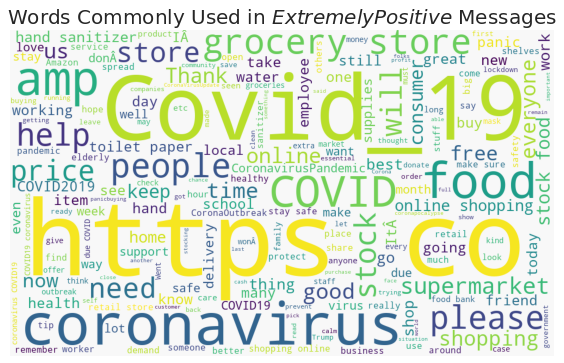

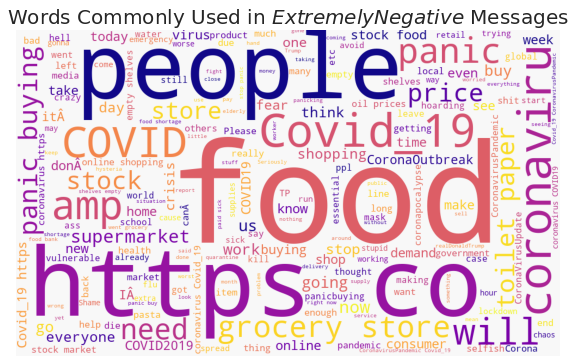

In [95]:
from wordcloud import WordCloud
from keras.models import load_model

#from wordcloud import WordCloud
for label, cmap in zip(['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative'],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = train_data.query('Sentiment == @label')['OriginalTweet'].str.cat(sep=' ')
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

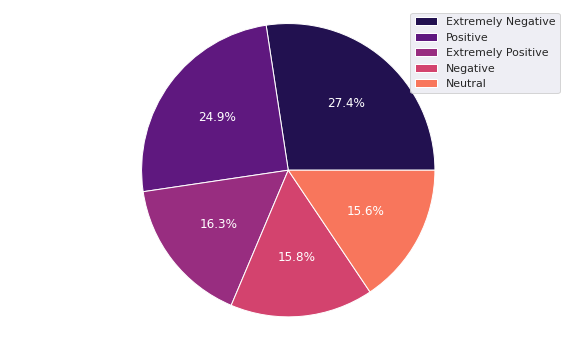

In [96]:
#Pie Chart for the Sentiments Percentage 
plt.figure(figsize=(10,6))
plt.pie(train_data['Sentiment'].value_counts(), labels=train_data['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Total Sentiment Distributions Histogram')

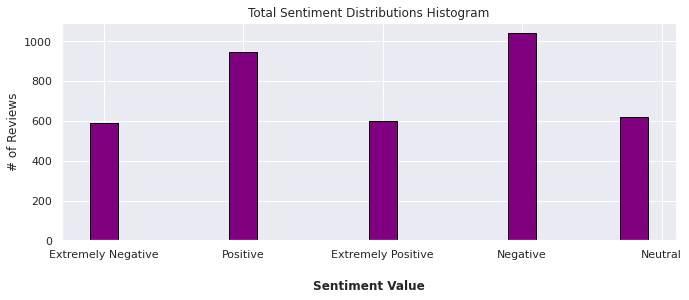

In [97]:
# Show the counts of observations in "Sentiment" using histogram
plt.hist(train_data['Sentiment'], bins=20, align='left', color='purple', edgecolor='black')
plt.xlabel('Sentiment Value',labelpad=20, weight='bold', size=12)
plt.ylabel('# of Reviews')
plt.title('Total Sentiment Distributions Histogram')

In [98]:
# Identify null values in the dataframe
test_data.isnull().sum().sort_values(ascending=False)

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [99]:
# Identify null values in the dataframe
train_data.isnull().sum().sort_values(ascending=False)

Location         834
UserName           0
ScreenName         0
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

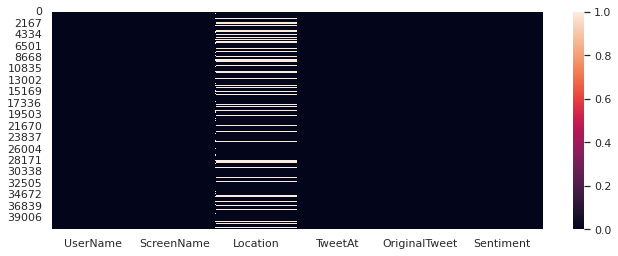

In [100]:
# check for null value in train_data
sns.heatmap(test_data.isnull());

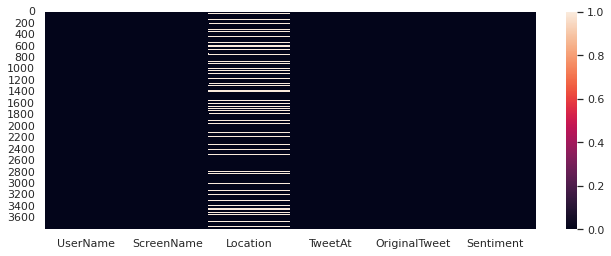

In [101]:
# check for null value in train_data
sns.heatmap(train_data.isnull());

In [102]:
#Identify duplcate values in the dataframe
test_data.duplicated().sum()

0

In [103]:
#Identify duplcate values in the dataframe
train_data.duplicated().sum()

0

In [104]:
# Total number of unique values
train_data.nunique()

UserName         3798
ScreenName       3798
Location         1717
TweetAt            15
OriginalTweet    3798
Sentiment           5
dtype: int64

In [105]:
# Total number of unique values
test_data.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [106]:
# Generate descriptive statistics in the dataframe exclude objects and Datetime data types
train_data.describe()

,UserName,ScreenName
count,3798.000000,3798.000000
mean,1899.500000,46851.500000
std,1096.532489,1096.532489
min,1.000000,44953.000000
25%,950.250000,45902.250000
50%,1899.500000,46851.500000
75%,2848.750000,47800.750000
max,3798.000000,48750.000000


In [107]:
# Generate descriptive statistics in the dataframe exclude objects and Datetime data types
test_data.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [108]:
# Remove missing values in test dataset
test_data = test_data.dropna()
test_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


In [109]:
# Remove missing values in train dataset
train_data = train_data.dropna()
train_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
...,...,...,...,...,...,...
3792,3793,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral


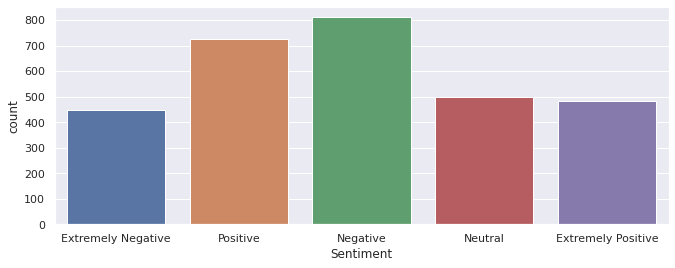

In [110]:
# Display "Sentiment" column data in Seaborn graph
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,4)})
sns.countplot(train_data['Sentiment'])

Text(0.5, 1.0, 'Total Sentiment Distributions Histogram')

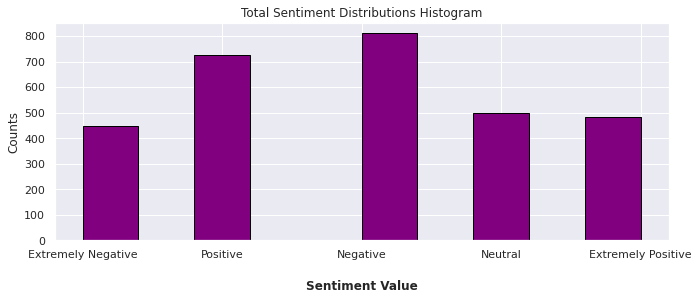

In [111]:
# Show the counts of observations in "Sentiment" using histogram
plt.hist(train_data['Sentiment'], bins=10, align='mid', color='purple', edgecolor='black')
plt.xlabel('Sentiment Value',labelpad=20, weight='bold', size=12)
plt.ylabel('Counts')
plt.title('Total Sentiment Distributions Histogram')

In [112]:
# As we can see we have 5 types of sentiment (but we can make extremely positive into positive and extremely negative into negative )
def change_sen(sentiment):
    if sentiment == "Extremely Positive":
        return 'positive'
    elif sentiment == "Extremely Negative":
        return 'negative'
    elif sentiment == "Positive":
        return 'positive'
    elif sentiment == "Negative":
        return 'negative'
    else:
        return 'netural'

In [113]:
# Applying the change_sen function/method
train_data['Sentiment'] = train_data['Sentiment'].apply(lambda x: change_sen(x))
test_data['Sentiment'] = test_data['Sentiment'].apply(lambda x: change_sen(x))

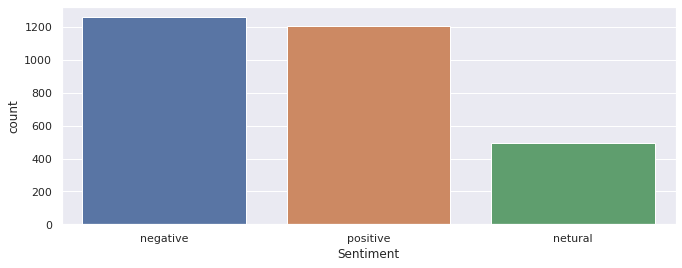

In [114]:
# Show the counts of observations in "Sentiment" using bar
sns.countplot(train_data['Sentiment'])

Text(0.5, 1.0, 'Total Sentiment Distributions Histogram')

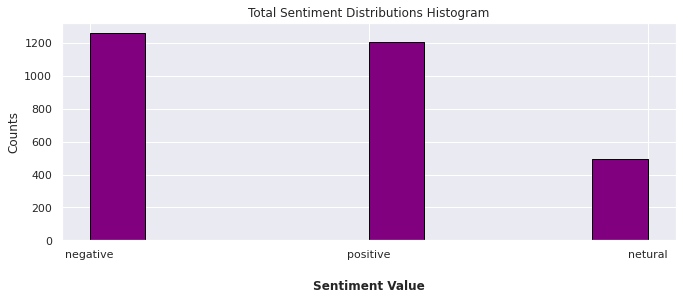

In [115]:
# Show the counts of observations in "Sentiment" using histogram
plt.hist(train_data['Sentiment'], bins=10, align='mid', color='purple', edgecolor='black')
plt.xlabel('Sentiment Value',labelpad=20, weight='bold', size=12)
plt.ylabel('Counts')
plt.title('Total Sentiment Distributions Histogram')

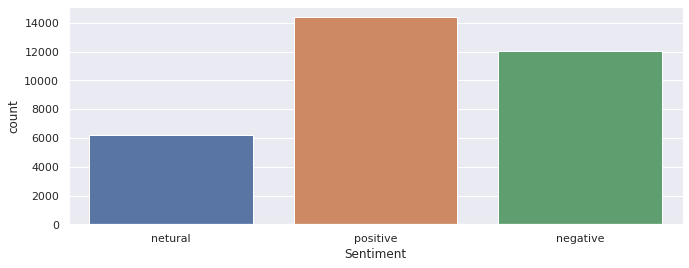

In [116]:
sns.countplot(test_data['Sentiment'])

# Data Clearning and processing

In [117]:
# load stop words
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# nltk libraries
import nltk
nltk.download('stopwords')
lemmatiser = WordNetLemmatizer()

stop_word = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [118]:
def clean(text):

    #     remove urls
    text = re.sub(r'http\S+', " ", text)

    #     remove mentions
    text = re.sub(r'@\w+',' ',text)

    #     remove hastags
    text = re.sub(r'#\w+', ' ', text)

    #     remove digits
    text = re.sub(r'\d+', ' ', text)

    #     remove html tags
    text = re.sub('r<.*?>',' ', text)
    
    #     remove stop words 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word])
    
      
    return text

In [119]:
# Map sentiment column to digits
l = {"netural":0, "positive":1,"negative":2}

In [120]:
train_data['Sentiment'] = train_data['Sentiment'].map(l)
test_data['Sentiment']  = test_data['Sentiment'].map(l)

In [121]:
train_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,2
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,1
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,2
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,0
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,0
...,...,...,...,...,...,...
3792,3793,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",2
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,1
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,2
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,0


In [122]:
test_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,1
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,1
...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,2
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,2
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,1
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,0


In [123]:
# Saved cleas dataset
test_data.to_csv(path1, encoding='utf-8')
train_data.to_csv(path2, encoding='utf-8')

In [124]:
x_train = train_data['OriginalTweet'].copy()
x_test = test_data['OriginalTweet'].copy()

y_train = train_data['Sentiment'].copy()
y_test = test_data['Sentiment'].copy()

In [125]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2964,), (2964,), (32567,), (32567,))

In [126]:
# Maxiumn lenght of sequence
max_len = np.max(x_train.apply(lambda x :len(x)))
max_len

344

In [127]:
# Tokenizer initlization
tokenizer = Tokenizer()

In [128]:
tokenizer.fit_on_texts(x_train)
vocab_length = len(tokenizer.word_index) + 1

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

In [129]:
print("Vocab length:", vocab_length)
print("Max sequence length:", max_len)

Vocab length: 12594
Max sequence length: 344


In [130]:
# An algorithm to train a set of fixed-length dense and continuous-valued vectors based on a large corpus of text
embedding_dim = 16

In [131]:
def create_corpus(target):
    corpus=[]
    
    for x in train_data[train_data['Sentiment']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [132]:
np.array(stopwords)

array(<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>,
      dtype=object)

# Model Creation

In [133]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [134]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 344, 16)           201504    
                                                                 
 bidirectional (Bidirectiona  (None, 344, 512)         420864    
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 512)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1

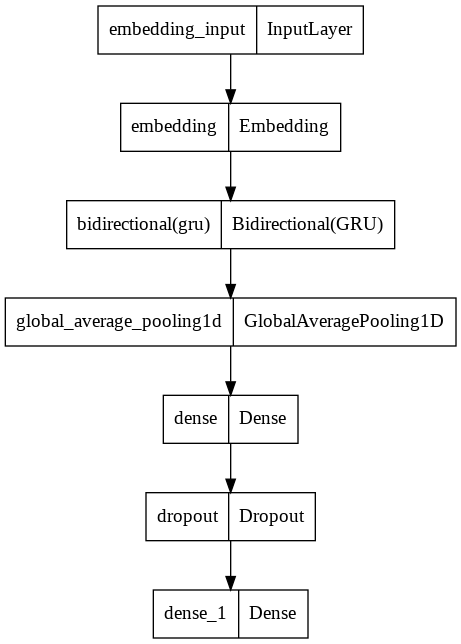

In [135]:
tf.keras.utils.plot_model(model)

In [136]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2964, 344), (32567, 344), (2964,), (32567,))

In [137]:
from keras.utils.np_utils import to_categorical
#from keras.utils import to_categorical

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

# Model training

In [138]:
num_epochs = 10
history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))

Epoch 1/10
93/93 [==============================] - 535s 6s/step - loss: 1.0464 - accuracy: 0.4308 - val_loss: 1.0532 - val_accuracy: 0.3688
Epoch 2/10
93/93 [==============================] - 537s 6s/step - loss: 1.0386 - accuracy: 0.4224 - val_loss: 1.0517 - val_accuracy: 0.3688
Epoch 3/10
93/93 [==============================] - 534s 6s/step - loss: 1.0333 - accuracy: 0.4052 - val_loss: 1.0413 - val_accuracy: 0.3689
Epoch 4/10
93/93 [==============================] - 534s 6s/step - loss: 0.9866 - accuracy: 0.4497 - val_loss: 0.9821 - val_accuracy: 0.4218
Epoch 5/10
93/93 [==============================] - 538s 6s/step - loss: 0.8683 - accuracy: 0.5152 - val_loss: 0.9914 - val_accuracy: 0.4334
Epoch 6/10
93/93 [==============================] - 529s 6s/step - loss: 0.7634 - accuracy: 0.5584 - val_loss: 1.0415 - val_accuracy: 0.4667
Epoch 7/10
93/93 [==============================] - 543s 6s/step - loss: 0.6688 - accuracy: 0.6198 - val_loss: 1.0947 - val_accuracy: 0.4925
Epoch 8/10
93

In [139]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [140]:
# Model Accuracy and loss
print(f"Accuracy on training data is:- {acc[-1]*100} %")
print(f"Loss {loss[-1]*100}")

print(f"Accuracy on validation data is:- {val_acc[-1]*100} %")
print(f"Loss {val_loss[-1]*100}")

Accuracy on training data is:- 90.48582911491394 %
Loss 28.31108272075653
Accuracy on validation data is:- 48.782509565353394 %
Loss 168.66775751113892


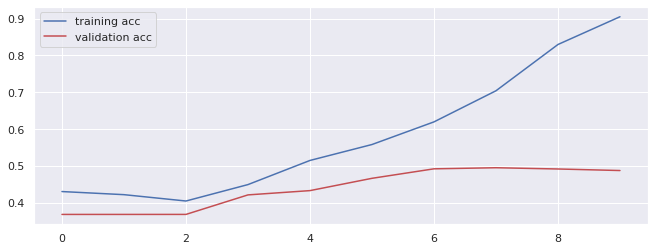

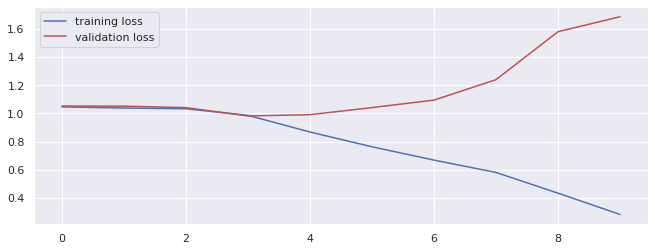

In [141]:
# Plotting
epochs = range(len(acc))

plt.plot(epochs, acc,'b',label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.legend()
plt.show()

plt.plot(epochs, loss,'b',label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.legend()
plt.show()